Hello,I am Shashank pandey, this is my first project on dataset. I am trying to show or practice some of my skills which i learned in Edubridge.
This project is related to health field.

# Medical Cost Personal Dataset

## Columns

age: age of primary beneficiary

sex: to describe gender whether it male or female

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
Below 18.5--underweight
18.5-24.9--normal
25-29.9--overweight
30.0 to more--very overweight

children: Number of children covered by health insurance / Number of dependents

smoker: Whether that person do smoking or not

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### Charges column is the target variable

### In notebook I am trying to analysing and use predictive modelling on medical cost with other variables.

In [1]:
#load basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df=pd.read_csv('G:\\ML project\\insurance.csv')

In [3]:
#read the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Size of data set
df.shape

(1338, 7)

In [5]:
#to find unique value in each column
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
#Generate descriptive statistics.
# Descriptive statistics include those that summarize the centraltendency, dispersion and shape of a 
# dataset's distribution, excluding ``NaN`` values.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Missing values check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Check the structure of dataset
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Data Visualization

### Finding correlation between BMI and Charges by ploting a scatter plot.

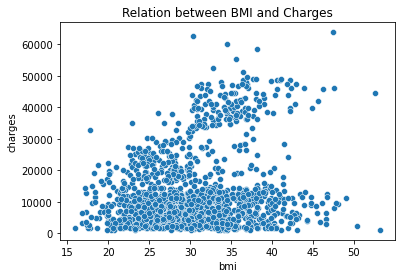

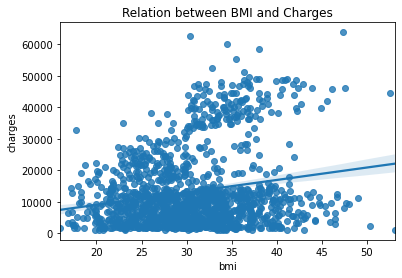

In [9]:
plt.title('Relation between BMI and Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'])
plt.show()
plt.title('Relation between BMI and Charges')
sns.regplot(x=df['bmi'],y=df['charges'])  #This method is used to plot data and a linear refression model fit.
plt.show()

The scatterplot above shows that body mass index (BMI) and insurance charges are increasing correlatively, where customers with higher BMI typically also tend to pay more in insurance costs. The positive regression line proves it.

## Finding correlation between Smokers and Charges by ploting a scatter plot.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

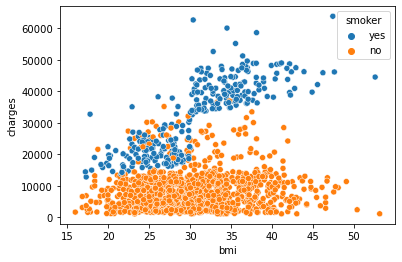

In [10]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

The scatter plot shows that while nonsmokers do tend to pay slightly more with increasing BMI, smokers pay much more. To further emphasize this fact, I have added two regression lines, corresponding to smokers and nonsmokers.



## Finding correlation between Children and Charges.

<AxesSubplot:title={'center':'Relation between Age and charge'}, xlabel='children', ylabel='charges'>

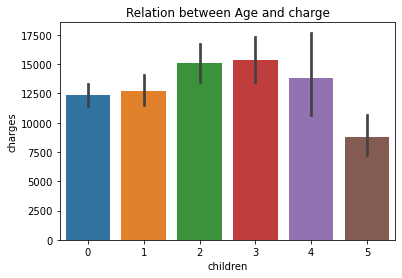

In [11]:
plt.title('Relation between Age and charge')
sns.barplot(x=df['children'],y=df['charges'])

We can see here that person having 2-3 children have to pay more charges but person having 5 children pays the least insurance charges.

## Finding correlation between Age and Charges by ploting a scatter plot.

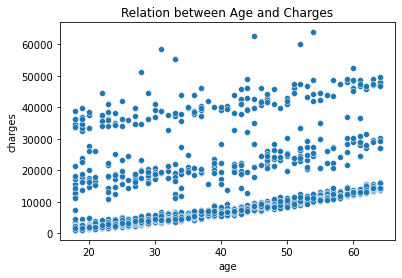

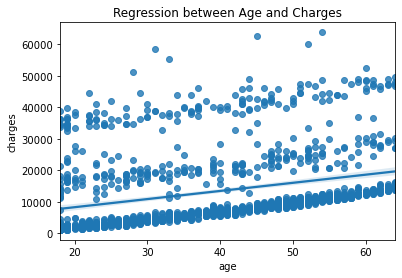

In [12]:
plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()
plt.title('Regression between Age and Charges')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

We can notice that older people tend to pay slightly more but to make it more clearer we can draw a regression link. The regression line shows positive correlation. Hence, Age plays small role in predicting insurance price.

## Finding correlation between Region and Charges by ploting a barplot plot

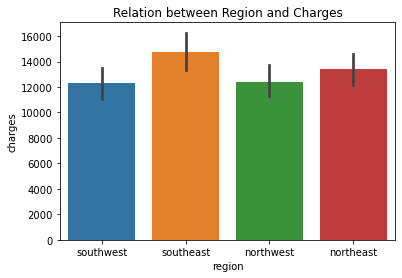

In [13]:
plt.title('Relation between Region and Charges')
sns.barplot(x=df['region'], y=df['charges'])
plt.show()

Southeast region have to more charges whereas southwest and northwest region having almost equal charges

#### Finding correlation between Sex and Charges by ploting barplot

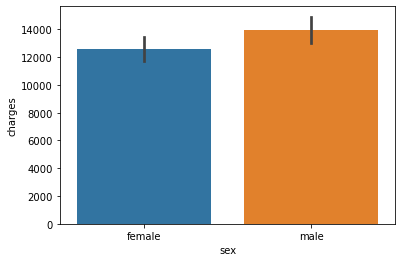

In [14]:

sns.barplot(x=df['sex'], y=df['charges'])
plt.show()

The bar chart also shows that there is very little difference between average cost paid by mail and female. Hence, sex of the person does not necessarily determine the insurance charges one pays.

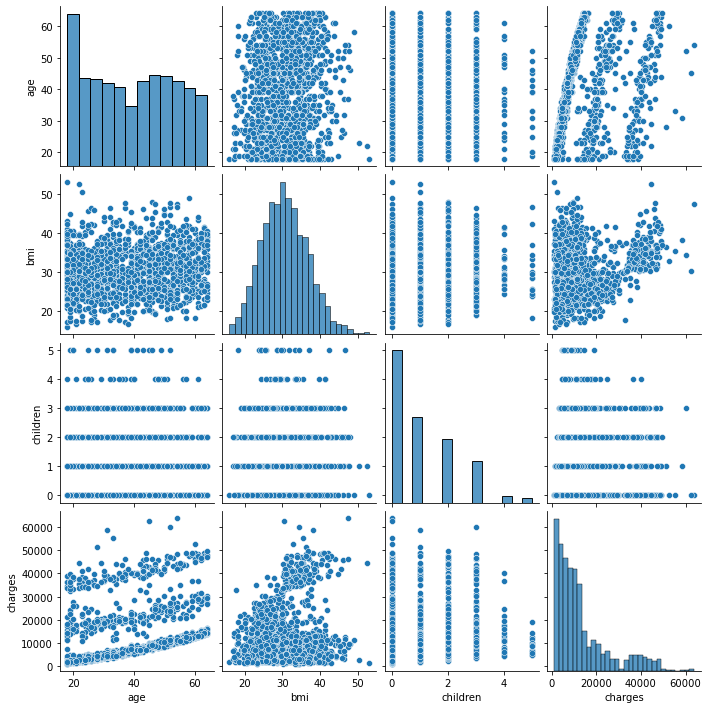

In [15]:
sns.pairplot(df)

### Data Preprocessing

In [16]:
#checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset



### Now i am using boxplot to find the outliers

<AxesSubplot:ylabel='age'>

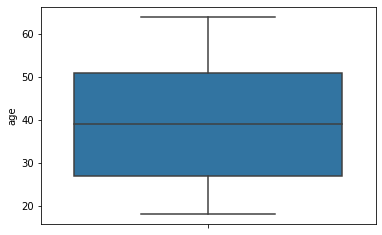

In [17]:
sns.boxplot(y = 'age', data = df)


Age doesn't contain ouliers

<AxesSubplot:ylabel='charges'>

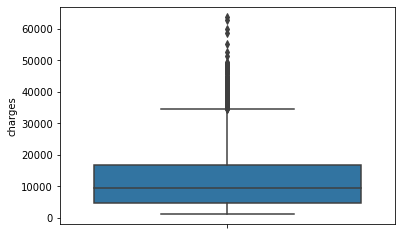

In [18]:
sns.boxplot(y = 'charges', data = df) #using boxplot to find outliers in charges

<AxesSubplot:ylabel='bmi'>

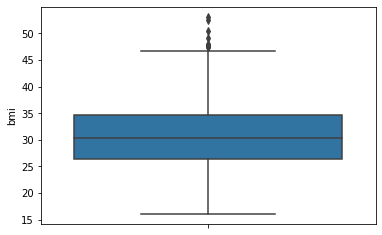

In [19]:
sns.boxplot(y = 'bmi', data = df)

From above 3 boxplots, we can see that BMI and charges contain outliers while age does not contain outlier.

In [20]:
#bmi data in dataset
bmi=df[['bmi']]
bmi

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [22]:
# to remove outliers, i replaced outlier value more than Q3 values wih Q3 
df['new_bmi']=np.where(df['bmi']>46.5,46.5,df['bmi'])

<AxesSubplot:ylabel='new_bmi'>

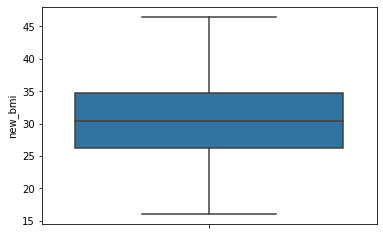

In [23]:
sns.boxplot(y = 'new_bmi', data = df)  #new bmi with no outliers

In [24]:
df['new_bmi'].describe()

count    1338.000000
mean       30.644316
std         6.041577
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        46.500000
Name: new_bmi, dtype: float64

In [25]:
df #checking for new bmi dataset

,age,sex,bmi,children,smoker,region,charges,new_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,27.900
1,18,male,33.770,1,no,southeast,1725.55230,33.770
2,28,male,33.000,3,no,southeast,4449.46200,33.000
3,33,male,22.705,0,no,northwest,21984.47061,22.705
4,32,male,28.880,0,no,northwest,3866.85520,28.880
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30.970
1334,18,female,31.920,0,no,northeast,2205.98080,31.920
1335,18,female,36.850,0,no,southeast,1629.83350,36.850
1336,21,female,25.800,0,no,southwest,2007.94500,25.800


In [26]:
#removing outliers by replacing its values by Q3
df['new_charges']=np.where(df['charges']>34000,34000,df['charges'])  

<AxesSubplot:ylabel='new_charges'>

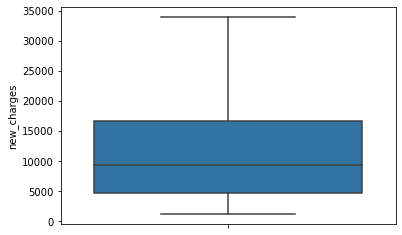

In [27]:
sns.boxplot(y = 'new_charges', data = df) # new chargescolumn data with no outliers

In [28]:
df #checking of new charges data in dataset

,age,sex,bmi,children,smoker,region,charges,new_bmi,new_charges
0,19,female,27.900,0,yes,southwest,16884.92400,27.900,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,33.770,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,33.000,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,22.705,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,28.880,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30.970,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080,31.920,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350,36.850,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500,25.800,2007.94500


In [29]:
df=df.drop(labels='bmi',axis=1)  #removing bmi column

In [30]:
df.shape  #shape of dataset after removal of bmi

(1338, 8)

In [31]:
df.drop(labels='charges',axis=1) #removing charges column

,age,sex,children,smoker,region,new_bmi,new_charges
0,19,female,0,yes,southwest,27.900,16884.92400
1,18,male,1,no,southeast,33.770,1725.55230
2,28,male,3,no,southeast,33.000,4449.46200
3,33,male,0,no,northwest,22.705,21984.47061
4,32,male,0,no,northwest,28.880,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,3,no,northwest,30.970,10600.54830
1334,18,female,0,no,northeast,31.920,2205.98080
1335,18,female,0,no,southeast,36.850,1629.83350
1336,21,female,0,no,southwest,25.800,2007.94500


Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [34]:
df.head(10)

,age,sex,children,smoker,region,charges,new_bmi,new_charges
0,19,0,0,1,3,16884.92400,27.900,16884.92400
1,18,1,1,0,2,1725.55230,33.770,1725.55230
2,28,1,3,0,2,4449.46200,33.000,4449.46200
3,33,1,0,0,1,21984.47061,22.705,21984.47061
4,32,1,0,0,1,3866.85520,28.880,3866.85520
5,31,0,0,0,2,3756.62160,25.740,3756.62160
6,46,0,1,0,2,8240.58960,33.440,8240.58960
7,37,0,3,0,1,7281.50560,27.740,7281.50560
8,37,1,2,0,0,6406.41070,29.830,6406.41070
9,60,0,0,0,1,28923.13692,25.840,28923.13692


In [35]:
df.isnull().sum()  #checking again if their are any nullvalue after dealing with outliers

age            0
sex            0
children       0
smoker         0
region         0
charges        0
new_bmi        0
new_charges    0
dtype: int64

#### Dividing into features and target variable

In [36]:
x=df[['age','sex','children','smoker','region','new_bmi']]  # define x dataset
y=df[['new_charges']]   # define y dataset

In [45]:
x.head()

,age,sex,children,smoker,region,new_bmi
0,19,0,0,1,3,27.900
1,18,1,1,0,2,33.770
2,28,1,3,0,2,33.000
3,33,1,0,0,1,22.705
4,32,1,0,0,1,28.880


In [46]:
y.head()

,new_charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


### Spliting Dataset into train and test data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 51)

In [41]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()


First, i have divided our dataset into dependent and independent variables, like in x and y.Next, i have applied train test split from the sklearn library so that we can divide our dataset into training and testing.
In the next cell, we just call linear regression from the sklearn library.
In the next line we have applied regressor.fit because this is our trained dataset.

#### Create Model & Fit
Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained

In [42]:
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
# Here i am compare real value with predicted values
y_pred = lr.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,7789.63500,9338.418171
1,34000.00000,32194.868133
2,2464.61880,3905.553619
3,8964.06055,10806.440246
4,34000.00000,29812.972433
...,...,...
263,6610.10970,11015.426675
264,18648.42170,24637.380126
265,32548.34050,22944.990700
266,34000.00000,33485.422369


Now, let's check accuracy of the model with this dataset.

In [44]:
accuracy=regressor.score(x_test,y_test)
'Accuracy : {}%'.format(int(round(accuracy*100))) 

'Accuracy : 75%'

Here, we got 75% of accuracy